## Problem Statement 1:
## Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table: 
## High School Bachelors Masters Ph.d. Total
# Female 60 54 46 41 201
# Male 40 44 53 57 194
# Total 100 98 99 98 395
## Question: Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

Null Hypothesis: The two categorical variables are independent.

Alternative Hypothesis: The two categorical variables are dependent

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
female = [60, 54, 46, 41]
male = [40, 44, 53, 57]
high_school = [60,40]
bachelors = [54,44]
masters = [46, 53]
phd = [41, 57]

In [3]:
gender_data = pd.DataFrame(data=[[60, 54, 46, 41], 
                                 [40, 44, 53, 57]],
                          index=['female', 'male'],
                          columns=['High School', 'Bachelors', 'Masters', 'Ph.d.'])

In [4]:
gender_data

,High School,Bachelors,Masters,Ph.d.
female,60,54,46,41
male,40,44,53,57


In [9]:
education_wise = pd.melt(gender_data.reset_index(), 
                      id_vars='index', 
                      var_name='education', 
                      value_name='marks').rename(columns={'index': 'gender'})

In [10]:
education_wise

,gender,education,marks
0,female,High School,60
1,male,High School,40
2,female,Bachelors,54
3,male,Bachelors,44
4,female,Masters,46
5,male,Masters,53
6,female,Ph.d.,41
7,male,Ph.d.,57


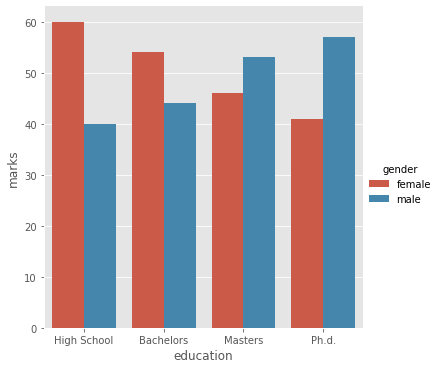

In [12]:
g = sns.factorplot(kind='bar', x='education', y='marks', hue="gender", data=education_wise)


In [13]:
row_totals = gender_data.sum(axis=1)
row_totals

female    201
male      194
dtype: int64

In [14]:
column_totals = gender_data.sum(axis=0)
column_totals.to_frame().T

,High School,Bachelors,Masters,Ph.d.
0,100,98,99,98


In [15]:
expected_frequencies = pd.concat(
    {c: row_totals for c in gender_data.columns}, 
    axis=1).mul(column_totals).div(gender_data.sum(axis=1).sum())
expected_frequencies

,High School,Bachelors,Masters,Ph.d.
female,50.886076,49.868354,50.377215,49.868354
male,49.113924,48.131646,48.622785,48.131646


In [16]:
#Chi Square test statistic
t_stat = gender_data.sub(
    expected_frequencies).pow(2.0).div(
    expected_frequencies).sum(axis=1).sum()
t_stat

8.006066246262538

In [17]:
df = (gender_data.shape[0]-1) * (gender_data.shape[1]-1)
df

3

In [18]:
from scipy.stats import chi2
chi2_dist = chi2(df=df)
p_val = chi2_dist.sf(t_stat)

sig_level = 0.05
print('P-val of chi^2 test at significance level {:.2f} is {:.4f}'.format(sig_level, p_val))

P-val of chi^2 test at significance level 0.05 is 0.0459


P-val of chi^2 test at significance level 0.05 is 0.0459
Since the P-val is less than the significance level, we will reject the null hypothesis
Conslusion is that the two categorical variables are dependent. 
Education level is dependent on gender at 5% significance level.

## Problem Statement 2:
## Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.

## [Group1: 51, 45, 33, 45, 67]
## [Group2: 23, 43, 23, 43, 45]
## [Group3: 56, 76, 74, 87, 56]

ANOVA is a statistical inference test that lets us to compare multiple groups at the same time.. 

In [19]:
import scipy.stats as stats

In [20]:
group1 = [51, 45, 33, 45, 67]
group2 = [23, 43, 23, 43, 45]
group3 = [56, 76, 74, 87, 56]

In [21]:
statistic, pvalue = stats.f_oneway(group1,group2, group3 )
print("F Statistic value is {}, and pvalue is {}".format(statistic,pvalue ))

F Statistic value is 9.747205503009463, and pvalue is 0.0030597541434430556


pvalue is less than 0.05
So the groups have differnet sample means.

## Problem Statement 3:
## Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.
## For 10, 20, 30, 40, 50:

In [22]:
stats.f_oneway([10, 20, 30, 40, 50],[5,10,15, 20, 25] )

F_onewayResult(statistic=3.6, pvalue=0.0943497728424377)

In [ ]:
group1= [10, 20, 30, 40, 50]
group2 = [5,10,15, 20, 25]
mean1 = np.mean(group1)
mean2 = np.mean(group2)
var_cal_1 = 0
var_cal_2 = 0
for i in group1:
    var_cal_1 + = (i-mean1)**2

for i in group2:
    var_cal_2 + = (i-mean2)**2

var1 =  var_cal_1/5-1